# Deep Learning for Character Classification on Google Street View Housing

### Summary

1. Extraction of dataset from HDF and building Image Classification pipeline with train/val/test splits

2. Determining optimal k-Nearest Neighbor value and implement KNN classifier 

3. Building deep neural network classifier (Fully Connected Layer with one hidden layer) from scratch in Python 

4. Implementation of feedforward neural network, RELU activations, vectorized backpropagation, cost stochastic gradient descent, cross entropy loss, cost functions and batch normalization

5. Running Neural Network for permutations and combinations of hyper parameters and choose best parameters 

6. Implementing neural network using Keras and identifying optimal hyper parameters

7. Applying ensemble of neural network classifiers 

8. Comparison of traditional method (KNN) and Neural Networks using Python and Keras



## Import necessary packages 

In [1]:
import h5py
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt

## Extract datasets from HDF file

In [2]:
filename = 'SVHN_single_grey1.h5'
f = h5py.File(filename, 'r')

# List all groups
a_group_key = list(f.keys())
a_group_key

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

## Reshape datasets for model compatibility 

In [3]:
X_train = f.get('X_train')
Xtrain = np.asarray(X_train)
Xtrain = Xtrain.reshape(42000, 1024)
Xtrain.shape

(42000, 1024)

In [4]:
X_val = f.get('X_val')
Xval = np.asarray(X_val)
Xval = Xval.reshape(60000, 1024)
Xval.shape

(60000, 1024)

In [5]:
X_test = f.get('X_test')
Xtest = np.asarray(X_test)
Xtest = Xtest.reshape(18000, 1024)
Xtest.shape

(18000, 1024)

In [6]:
y_train = f.get('y_train')
y_train = np.asarray(y_train)
y_train.shape

(42000,)

In [7]:
y_val = f.get('y_val')
y_val = np.asarray(y_val)
y_val.shape

(60000,)

In [8]:
y_test = f.get('y_test')
y_test = np.asarray(y_test)
y_test.shape

(18000,)

## Normalize as per image data 

In [9]:
# normalize inputs from 0-255 to 0-1

Xtrain = Xtrain / 255.0
Xval = Xval / 255.0
Xtest = Xtest / 255.0

## Visualize Images 

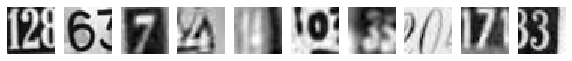

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [33]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(Xtrain[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## Use K-Nearest Neighbor Algorithm 

##### Explore optimal K for KNN 

In [10]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k

kVals = range(1, 6, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier

for k in range(1, 6, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(Xtrain, y_train)
          # evaluate the model and update the accuracies list
          score = model.score(Xval, y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          
# find the value of k that has the largest accuracy
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
accuracies[i] * 100))


k=1, accuracy=83.78%
k=3, accuracy=62.83%
k=5, accuracy=62.42%
k=1 achieved highest accuracy of 83.78% on validation data


##### Use KNN on training set using best value of K (=1) and get performance details of KNN on Testing data

In [11]:
# re-train our classifier using the best k value (=1) and predict the labels of the
# test data

model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, y_train)
predictions = model.predict(Xtest)
#print(predictions[1])
score = model.score(Xtest, y_test)
print("Test Accuracy=%.2f%%" % (score * 100))

# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits

print("Evaluation on Test data")
print(classification_report(y_test, predictions))

print ("Confusion matrix")
print(confusion_matrix(y_test,predictions))

Test Accuracy=45.92%
Evaluation on Test data
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
           7       0.63      0.59      0.61      1808
           8       0.34      0.37      0.36      1812
           9       0.39      0.40      0.40      1804

    accuracy                           0.46     18000
   macro avg       0.46      0.46      0.46     18000
weighted avg       0.46      0.46      0.46     18000

Confusion matrix
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  61

## Use Neural Network Using Python 

##### Implement Fully Connected Layer with one hidden layer 

In [12]:
# Fully Connected Layer (Linear Layer)

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

In [11]:
# Rectified Linear Activation Layer (ReLU)

class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

In [12]:
# Defining the softmax function

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [13]:
# Defining the Cross Entropy Loss

class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

In [14]:
# Here, we define the container NN class that enables the forward prop and backward propagation of the entire network. 
# This enables us to add layers of different types and also pass gradients using the chain rule.

class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

In [16]:
# Defining the update function (SGD with momentum)
def update_params(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] - learning_rate * g[i]
            p[i] += v[i]

In [17]:
# Defining a function which gives us the minibatches (both the datapoint and the corresponding label)
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

In [18]:
# The traning loop

def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update_params(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = np.array([], dtype="int64")
        y_val_pred = np.array([], dtype="int64")
        y_train1 = []
        y_vall = []
        for i in range(0, m_train, minibatch_size):
            X_tr = X_train[i:i + minibatch_size, : ]
            y_tr = y_train[i:i + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for i in range(0, m_val, minibatch_size):
            X_va = X_val[i:i + minibatch_size, : ]
            y_va = y_val[i:i + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)

        mean_train_loss = sum(loss_batch) / float(len(loss_batch))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3}".format(mean_train_loss, train_acc, mean_val_loss, val_acc))
    return net

In [19]:
# Checking the accuracy of the model
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

## Run NN for various permutations and combinations of hyper parameters 

In [21]:
from random import shuffle

## input size
input_dim = Xtrain.shape[1]

## hyperparameters
iterations = 200
learning_rate = 0.01
hidden_nodes = 1000
output_nodes = 10

## define neural net
nn = NN()
nn.add_layer(Linear(input_dim, hidden_nodes))
nn.add_layer(ReLU())
nn.add_layer(Linear(hidden_nodes, output_nodes))

nn = train(nn, Xtrain , y_train, minibatch_size=200, epoch=iterations, \
           learning_rate=learning_rate, X_val=Xval, y_val=y_val)

Loss = 2.299570466517278 | Training Accuracy = 0.15338095238095237 | Val Loss = 2.293753332689139 | Val Accuracy = 0.1536
Loss = 2.2681186168103156 | Training Accuracy = 0.3345238095238095 | Val Loss = 2.2232434176991878 | Val Accuracy = 0.33425
Loss = 2.117856876814809 | Training Accuracy = 0.3905 | Val Loss = 1.9607768342891632 | Val Accuracy = 0.39086666666666664
Loss = 1.822654272923574 | Training Accuracy = 0.5100714285714286 | Val Loss = 1.6610501631808994 | Val Accuracy = 0.5107333333333334
Loss = 1.5625097365056502 | Training Accuracy = 0.584952380952381 | Val Loss = 1.4592783500155522 | Val Accuracy = 0.58485
Loss = 1.380325118817089 | Training Accuracy = 0.6294285714285714 | Val Loss = 1.3155252817010556 | Val Accuracy = 0.6287333333333334
Loss = 1.2580282171354935 | Training Accuracy = 0.652952380952381 | Val Loss = 1.2144456348955306 | Val Accuracy = 0.6526
Loss = 1.1741537973876472 | Training Accuracy = 0.6699761904761905 | Val Loss = 1.142096368483676 | Val Accuracy = 0.6

Loss = 0.441956716206664 | Training Accuracy = 0.8452142857142857 | Val Loss = 0.5391609237239371 | Val Accuracy = 0.8358833333333333
Loss = 0.4414125748722879 | Training Accuracy = 0.8465952380952381 | Val Loss = 0.5513668911297323 | Val Accuracy = 0.8367666666666667
Loss = 0.4372113466569696 | Training Accuracy = 0.8461666666666666 | Val Loss = 0.5396458578931822 | Val Accuracy = 0.8368333333333333
Loss = 0.4340163635004303 | Training Accuracy = 0.8448333333333333 | Val Loss = 0.5563522545623023 | Val Accuracy = 0.83525
Loss = 0.43251194556875705 | Training Accuracy = 0.8469285714285715 | Val Loss = 0.5528971091117398 | Val Accuracy = 0.83735
Loss = 0.42928350233482576 | Training Accuracy = 0.8513571428571428 | Val Loss = 0.5355152372561919 | Val Accuracy = 0.8415333333333334
Loss = 0.4250828151495085 | Training Accuracy = 0.8525 | Val Loss = 0.5395657536597838 | Val Accuracy = 0.84235
Loss = 0.42076502606269944 | Training Accuracy = 0.8483333333333334 | Val Loss = 0.539153244488545 

Loss = 0.32333331437754065 | Training Accuracy = 0.8774761904761905 | Val Loss = 0.5251748763759309 | Val Accuracy = 0.86245
Loss = 0.31854043054580383 | Training Accuracy = 0.8866428571428572 | Val Loss = 0.5013037370994736 | Val Accuracy = 0.8708
Loss = 0.3178976454747998 | Training Accuracy = 0.8819047619047619 | Val Loss = 0.5317803326212519 | Val Accuracy = 0.8662666666666666
Loss = 0.31850068381850105 | Training Accuracy = 0.8795 | Val Loss = 0.5354634706535222 | Val Accuracy = 0.8647166666666667
Loss = 0.315814353442455 | Training Accuracy = 0.8805714285714286 | Val Loss = 0.5246619348401702 | Val Accuracy = 0.8653333333333333
Loss = 0.31266495416083007 | Training Accuracy = 0.8872619047619048 | Val Loss = 0.51864861427178 | Val Accuracy = 0.8706
Loss = 0.31285185412283495 | Training Accuracy = 0.885095238095238 | Val Loss = 0.5132050744404519 | Val Accuracy = 0.8683166666666666
Loss = 0.31240086615604007 | Training Accuracy = 0.8899761904761905 | Val Loss = 0.5180002449131371 |

Loss = 0.2492004308475857 | Training Accuracy = 0.9071666666666667 | Val Loss = 0.5320110265164998 | Val Accuracy = 0.8872333333333333
Loss = 0.2456478805310002 | Training Accuracy = 0.8946904761904761 | Val Loss = 0.5860318927673724 | Val Accuracy = 0.8756833333333334
Loss = 0.24461126649327983 | Training Accuracy = 0.9003333333333333 | Val Loss = 0.5758822057583495 | Val Accuracy = 0.8809166666666667
Loss = 0.24379855601717332 | Training Accuracy = 0.9025952380952381 | Val Loss = 0.5645045108772528 | Val Accuracy = 0.88225
Loss = 0.2448006901429751 | Training Accuracy = 0.8989285714285714 | Val Loss = 0.5648507042984449 | Val Accuracy = 0.8790333333333333
Loss = 0.2408633349124435 | Training Accuracy = 0.8993809523809524 | Val Loss = 0.6169320696416516 | Val Accuracy = 0.8796666666666667
Loss = 0.24233405574754852 | Training Accuracy = 0.9012619047619047 | Val Loss = 0.5976616229108143 | Val Accuracy = 0.8810833333333333
Loss = 0.2411223585212576 | Training Accuracy = 0.9067380952380

##### Identify the best hyper parameters - More than 20 different hyper parameter combinations were tried 

In [ ]:
Run	Hyper Parameters	Loss	Training Accuracy	Validation Loss	Validation Accuracy
1	"iterations = 50
learning_rate = 0.01
hidden_nodes = 500"	0.5253	82.93%	0.6802	82.14%
2	"iterations = 50
learning_rate = 0.005
hidden_nodes = 500"	0.6677	81.05%	0.8422	80.40%
3	"iterations = 50
learning_rate = 0.0075
hidden_nodes = 500"	0.5785	81.92%	0.6093	81.19%
4	"iterations = 50
learning_rate = 0.0125
hidden_nodes = 500"	0.5136	83.93%	0.6134	82.96%
5	"iterations = 50
learning_rate = 0.015
hidden_nodes = 500"	0.4994	83.80%	0.6643	82.97%
6	"iterations = 50
learning_rate = 0.02
hidden_nodes = 500"	0.5138	84.10%	0.5777	83.24%
7	"iterations = 50
learning_rate = 0.075
hidden_nodes = 1000"	0.8736	73.52%	0.9275	72.83%
8	"iterations = 50
learning_rate = 0.0075
hidden_nodes = 1000"	0.5518	83.70%	0.6945	82.88%
9	"iterations = 50
learning_rate = 0.02
hidden_nodes = 1000"	0.4999	83.51%	0.5220	82.60%
10	"iterations = 100
learning_rate = 0.02
hidden_nodes = 1000"	0.3745	87.46%	0.6511	85.84%
11	"iterations = 200
learning_rate = 0.01
hidden_nodes = 1000"	0.2450	91.45%	0.6135	89.30%
12	"iterations = 200
learning_rate = 0.0075
hidden_nodes = 1000"	0.2392	89.75%	0.4534	87.87%
13	"iterations = 200
learning_rate = 0.02
hidden_nodes = 1000"	0.2487	87.96%	0.4816	85.73%
14	"iterations = 200
learning_rate = 0.012
hidden_nodes = 1000"	0.2245	90.18%	0.4944	87.92%
15	"iterations = 200
learning_rate = 0.009
hidden_nodes = 1000"	0.2413	90.18%	0.6271	88.21%
16	"iterations = 200
learning_rate = 0.009
hidden_nodes = 10"	1.1631	63.57%	1.2745	63.31%
17	"iterations = 20
learning_rate = 0.009
hidden_nodes = 100"	0.9328	72.48%	0.9936	72.14%
18	"iterations = 20
learning_rate = 0.009
hidden_nodes = 1000"	0.8056	75.67%	0.7072	75.24%
19	"iterations = 20
learning_rate = 0.009
hidden_nodes = 2500"	0.7745	78.38%	0.7355	77.88%
20	"iterations = 200
learning_rate = 0.011
hidden_nodes = 500"	0.2668	88.76%	0.5717	86.91%
21	"iterations = 200
learning_rate = 0.01
hidden_nodes = 2000"	0.2305	91.12%	0.5005	88.91%


##### Apply model (with best hyper parameters) on Testing data

In [27]:
## input size
input_dim = Xtrain.shape[1]

## hyperparameters
iterations = 200
learning_rate = 0.01
hidden_nodes = 1000
output_nodes = 10

## define neural net
nn = NN()
nn.add_layer(Linear(input_dim, hidden_nodes))
nn.add_layer(ReLU())
nn.add_layer(Linear(hidden_nodes, output_nodes))

nn = train(nn, Xtrain, y_train, minibatch_size=200, epoch=iterations, \
           learning_rate=learning_rate, X_val=Xtest, y_val=y_test)

Loss = 2.2991101837027825 | Training Accuracy = 0.14526190476190476 | Val Loss = 2.295347168399871 | Val Accuracy = 0.14322222222222222
Loss = 2.2647512019702725 | Training Accuracy = 0.3348809523809524 | Val Loss = 2.2284456494436515 | Val Accuracy = 0.32944444444444443
Loss = 2.108943585725267 | Training Accuracy = 0.41595238095238096 | Val Loss = 1.9828527980279775 | Val Accuracy = 0.4122777777777778
Loss = 1.8113843207257911 | Training Accuracy = 0.510452380952381 | Val Loss = 1.7101220760929041 | Val Accuracy = 0.5095555555555555
Loss = 1.5528157803462495 | Training Accuracy = 0.5598809523809524 | Val Loss = 1.5224548294631572 | Val Accuracy = 0.5571111111111111
Loss = 1.3775569020444187 | Training Accuracy = 0.5986190476190476 | Val Loss = 1.379118940870355 | Val Accuracy = 0.5965
Loss = 1.2577407635071962 | Training Accuracy = 0.6315714285714286 | Val Loss = 1.2843954385042904 | Val Accuracy = 0.6286111111111111
Loss = 1.1752689339985654 | Training Accuracy = 0.6494047619047619 

Loss = 0.46080178551897677 | Training Accuracy = 0.8447142857142858 | Val Loss = 0.6207033850577868 | Val Accuracy = 0.812
Loss = 0.45644303362267746 | Training Accuracy = 0.8465714285714285 | Val Loss = 0.6105208543508012 | Val Accuracy = 0.8113888888888889
Loss = 0.45438606100424234 | Training Accuracy = 0.8448809523809524 | Val Loss = 0.6111289011574494 | Val Accuracy = 0.8105
Loss = 0.44979582473023605 | Training Accuracy = 0.8498571428571429 | Val Loss = 0.610051945664951 | Val Accuracy = 0.8137777777777778
Loss = 0.4473125246914303 | Training Accuracy = 0.8508333333333333 | Val Loss = 0.6045595877324529 | Val Accuracy = 0.8144444444444444
Loss = 0.44303929496156724 | Training Accuracy = 0.8528333333333333 | Val Loss = 0.6056668439535586 | Val Accuracy = 0.8161666666666667
Loss = 0.44052749698582905 | Training Accuracy = 0.8548333333333333 | Val Loss = 0.6118140917290306 | Val Accuracy = 0.8177777777777778
Loss = 0.4337260302579069 | Training Accuracy = 0.8533571428571428 | Val Lo

Loss = 0.3293670715141569 | Training Accuracy = 0.8837380952380952 | Val Loss = 0.5439331481301507 | Val Accuracy = 0.8297222222222222
Loss = 0.3290849943922977 | Training Accuracy = 0.8852380952380953 | Val Loss = 0.5216503662772276 | Val Accuracy = 0.8302777777777778
Loss = 0.3270022030822722 | Training Accuracy = 0.8839285714285714 | Val Loss = 0.5445295295495716 | Val Accuracy = 0.8307222222222223
Loss = 0.3247597393672097 | Training Accuracy = 0.8894761904761905 | Val Loss = 0.5339378002716213 | Val Accuracy = 0.8339444444444445
Loss = 0.32534089975207015 | Training Accuracy = 0.8876666666666667 | Val Loss = 0.5357512863932659 | Val Accuracy = 0.8307222222222223
Loss = 0.3244193346793292 | Training Accuracy = 0.8840714285714286 | Val Loss = 0.5446734136499334 | Val Accuracy = 0.8296666666666667
Loss = 0.3190272218890719 | Training Accuracy = 0.8886666666666667 | Val Loss = 0.5347454439536086 | Val Accuracy = 0.8306666666666667
Loss = 0.3160756759387311 | Training Accuracy = 0.8896

Loss = 0.2519462912642164 | Training Accuracy = 0.8978095238095238 | Val Loss = 0.5000282992111788 | Val Accuracy = 0.8285555555555556
Loss = 0.24965477884546253 | Training Accuracy = 0.8987142857142857 | Val Loss = 0.49709169271677667 | Val Accuracy = 0.8296666666666667
Loss = 0.24758549752914594 | Training Accuracy = 0.9011666666666667 | Val Loss = 0.489526846846339 | Val Accuracy = 0.8346111111111111
Loss = 0.24743078404763408 | Training Accuracy = 0.904 | Val Loss = 0.48069053897099623 | Val Accuracy = 0.8328888888888889
Loss = 0.24652886445490912 | Training Accuracy = 0.9028333333333334 | Val Loss = 0.48886690547027967 | Val Accuracy = 0.835
Loss = 0.24773147434742115 | Training Accuracy = 0.8985 | Val Loss = 0.4836099940151779 | Val Accuracy = 0.8318888888888889
Loss = 0.2494260628829373 | Training Accuracy = 0.9012142857142857 | Val Loss = 0.49932220346783157 | Val Accuracy = 0.8320555555555555
Loss = 0.24891352724073307 | Training Accuracy = 0.9027142857142857 | Val Loss = 0.48

## Build Neural Network Using Keras 

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# from keras import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential
from keras.utils.np_utils import to_categorical

from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers

Using TensorFlow backend.


## Identify best hyper parameters, create ensemble and apply model on Testing data

##### Iteration 1: 50 nodes X 4 layers X 5 ensemble X 100 epochs 

In [15]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [16]:
# create 5 models to ensemble
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)

In [17]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')

In [18]:
ensemble_clf.fit(Xtrain, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
42000/42000 [==============================] - 14s 329us/step - loss: 2.0933 - acc: 0.2178
Epoch 2/100
42000/42000 [==============================] - 8s 185us/step - loss: 1.7744 - acc: 0.3649
Epoch 3/100
42000/42000 [==============================] - 8s 187us/step - loss: 1.6267 - acc: 0.4370
Epoch 4/100
42000/42000 [==============================] - 8s 191us/step - loss: 1.5533 - acc: 0.4666
Epoch 5/100
42000/42000 [==============================] - 8s 188us/step - loss: 1.5147 - acc: 0.4867
Epoch 6/100
42000/42000 [==============================] - 8s 185us/step - loss: 1.4579 - acc: 0.5146
Epoch 7/100
42000/42000 [==============================] - 8s 188us/step - loss: 1.4171 - acc: 0.5382
Epoch 8/100
42000/42000 [=========================

42000/42000 [==============================] - 7s 177us/step - loss: 1.1204 - acc: 0.6573
Epoch 51/100
42000/42000 [==============================] - ETA: 0s - loss: 1.1263 - acc: 0.654 - 7s 178us/step - loss: 1.1265 - acc: 0.6548
Epoch 52/100
42000/42000 [==============================] - 8s 179us/step - loss: 1.1149 - acc: 0.6567
Epoch 53/100
42000/42000 [==============================] - 8s 180us/step - loss: 1.1218 - acc: 0.6550
Epoch 54/100
42000/42000 [==============================] - 8s 181us/step - loss: 1.1148 - acc: 0.6580
Epoch 55/100
42000/42000 [==============================] - 8s 180us/step - loss: 1.1153 - acc: 0.6596
Epoch 56/100
42000/42000 [==============================] - 7s 178us/step - loss: 1.1132 - acc: 0.6570
Epoch 57/100
42000/42000 [==============================] - 7s 176us/step - loss: 1.1143 - acc: 0.6578
Epoch 58/100
42000/42000 [==============================] - 8s 179us/step - loss: 1.1032 - acc: 0.6593
Epoch 59/100
42000/42000 [======================

42000/42000 [==============================] - 8s 186us/step - loss: 1.4295 - acc: 0.5287
Epoch 7/100
42000/42000 [==============================] - 8s 191us/step - loss: 1.3837 - acc: 0.5498
Epoch 8/100
42000/42000 [==============================] - 8s 187us/step - loss: 1.3479 - acc: 0.5682
Epoch 9/100
42000/42000 [==============================] - 8s 193us/step - loss: 1.3215 - acc: 0.5779
Epoch 10/100
42000/42000 [==============================] - 8s 193us/step - loss: 1.2972 - acc: 0.5859
Epoch 11/100
42000/42000 [==============================] - 8s 197us/step - loss: 1.2865 - acc: 0.5950
Epoch 12/100
42000/42000 [==============================] - 8s 189us/step - loss: 1.2652 - acc: 0.6029
Epoch 13/100
42000/42000 [==============================] - 8s 191us/step - loss: 1.2418 - acc: 0.6087
Epoch 14/100
42000/42000 [==============================] - 8s 184us/step - loss: 1.2441 - acc: 0.6101
Epoch 15/100
42000/42000 [==============================] - 8s 189us/step - loss: 1.2342 

42000/42000 [==============================] - 9s 216us/step - loss: 1.0885 - acc: 0.6619
Epoch 64/100
42000/42000 [==============================] - 9s 212us/step - loss: 1.0854 - acc: 0.6637
Epoch 65/100
42000/42000 [==============================] - 9s 219us/step - loss: 1.0952 - acc: 0.6605
Epoch 66/100
42000/42000 [==============================] - 9s 216us/step - loss: 1.0932 - acc: 0.6613
Epoch 67/100
42000/42000 [==============================] - 9s 226us/step - loss: 1.0986 - acc: 0.6603
Epoch 68/100
42000/42000 [==============================] - 9s 222us/step - loss: 1.0890 - acc: 0.6634
Epoch 69/100
42000/42000 [==============================] - 9s 217us/step - loss: 1.0907 - acc: 0.6666
Epoch 70/100
42000/42000 [==============================] - 9s 219us/step - loss: 1.0933 - acc: 0.6619
Epoch 71/100
42000/42000 [==============================] - 9s 215us/step - loss: 1.0751 - acc: 0.6653
Epoch 72/100
42000/42000 [==============================] - 9s 216us/step - loss: 1.09

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000000513CC88>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000000513CA20>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000000B91D4A8>),
                             ('model4',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000000B91D278>),
                             ('model5',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000000B91DBA8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [19]:
y_pred_val1 = ensemble_clf.predict(Xval)
print('Accuracy on Validation: ', accuracy_score(y_pred_val1, y_val))

Accuracy on Validation:  0.8183333333333334


In [20]:
y_pred1 = ensemble_clf.predict(Xtest)
print('Accuracy on Testing: ', accuracy_score(y_pred1, y_test))

Accuracy on Testing:  0.8039444444444445


##### Iteration 2: 200 nodes X 4 layers X 5 ensemble X 100 epochs 

In [21]:
def mlp_model2():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
# create 5 models to ensemble
model21 = KerasClassifier(build_fn = mlp_model2, epochs = 100)
model22 = KerasClassifier(build_fn = mlp_model2, epochs = 100)
model23 = KerasClassifier(build_fn = mlp_model2, epochs = 100)
model24 = KerasClassifier(build_fn = mlp_model2, epochs = 100)
model25 = KerasClassifier(build_fn = mlp_model2, epochs = 100)

In [23]:
ensemble_clf2 = VotingClassifier(estimators = [('model21', model21), ('model22', model22), ('model23', model23), ('model24', model24), ('model25', model25)], voting = 'soft')

In [24]:
ensemble_clf2.fit(Xtrain, y_train)

Epoch 1/100
42000/42000 [==============================] - 23s 547us/step - loss: 1.8897 - acc: 0.3216
Epoch 2/100
42000/42000 [==============================] - 20s 467us/step - loss: 1.4349 - acc: 0.5287
Epoch 3/100
42000/42000 [==============================] - 21s 489us/step - loss: 1.2652 - acc: 0.59890s - loss: 1.2659 - acc: 0.5
Epoch 4/100
42000/42000 [==============================] - 20s 473us/step - loss: 1.1766 - acc: 0.6298
Epoch 5/100
42000/42000 [==============================] - 19s 458us/step - loss: 1.1181 - acc: 0.6497
Epoch 6/100
42000/42000 [==============================] - 19s 460us/step - loss: 1.0718 - acc: 0.6634
Epoch 7/100
42000/42000 [==============================] - 19s 453us/step - loss: 1.0377 - acc: 0.6761
Epoch 8/100
42000/42000 [==============================] - 18s 428us/step - loss: 0.9967 - acc: 0.6895
Epoch 9/100
42000/42000 [==============================] - 18s 431us/step - loss: 0.9734 - acc: 0.6940
Epoch 10/100
42000/42000 [===================

42000/42000 [==============================] - 18s 438us/step - loss: 0.6593 - acc: 0.79433s - l
Epoch 53/100
42000/42000 [==============================] - 19s 443us/step - loss: 0.6551 - acc: 0.7957
Epoch 54/100
42000/42000 [==============================] - 18s 437us/step - loss: 0.6593 - acc: 0.7949
Epoch 55/100
42000/42000 [==============================] - 19s 443us/step - loss: 0.6495 - acc: 0.7997
Epoch 56/100
42000/42000 [==============================] - 19s 443us/step - loss: 0.6489 - acc: 0.7991
Epoch 57/100
42000/42000 [==============================] - 18s 432us/step - loss: 0.6424 - acc: 0.7995
Epoch 58/100
42000/42000 [==============================] - 18s 419us/step - loss: 0.6479 - acc: 0.7983
Epoch 59/100
42000/42000 [==============================] - 18s 426us/step - loss: 0.6430 - acc: 0.7979
Epoch 60/100
42000/42000 [==============================] - 18s 428us/step - loss: 0.6431 - acc: 0.7997
Epoch 61/100
42000/42000 [==============================] - 18s 435us/s

42000/42000 [==============================] - 18s 423us/step - loss: 1.0780 - acc: 0.6635
Epoch 7/100
42000/42000 [==============================] - 18s 430us/step - loss: 1.0352 - acc: 0.6771
Epoch 8/100
42000/42000 [==============================] - 17s 416us/step - loss: 1.0030 - acc: 0.6862
Epoch 9/100
42000/42000 [==============================] - 17s 416us/step - loss: 0.9698 - acc: 0.6983
Epoch 10/100
42000/42000 [==============================] - 18s 432us/step - loss: 0.9591 - acc: 0.7003
Epoch 11/100
42000/42000 [==============================] - 18s 433us/step - loss: 0.9266 - acc: 0.7114
Epoch 12/100
42000/42000 [==============================] - 18s 424us/step - loss: 0.9123 - acc: 0.7139
Epoch 13/100
42000/42000 [==============================] - 18s 438us/step - loss: 0.8913 - acc: 0.72201
Epoch 14/100
42000/42000 [==============================] - 18s 432us/step - loss: 0.8804 - acc: 0.7270
Epoch 15/100
42000/42000 [==============================] - 18s 428us/step - lo

42000/42000 [==============================] - 17s 409us/step - loss: 0.6468 - acc: 0.7975
Epoch 61/100
42000/42000 [==============================] - 18s 417us/step - loss: 0.6432 - acc: 0.7998
Epoch 62/100
42000/42000 [==============================] - 18s 421us/step - loss: 0.6382 - acc: 0.8022
Epoch 63/100
42000/42000 [==============================] - 18s 418us/step - loss: 0.6398 - acc: 0.8013
Epoch 64/100
42000/42000 [==============================] - 18s 417us/step - loss: 0.6328 - acc: 0.8037
Epoch 65/100
42000/42000 [==============================] - 18s 423us/step - loss: 0.6284 - acc: 0.8038
Epoch 66/100
42000/42000 [==============================] - ETA: 0s - loss: 0.6311 - acc: 0.804 - 17s 414us/step - loss: 0.6313 - acc: 0.8041
Epoch 67/100
42000/42000 [==============================] - 18s 429us/step - loss: 0.6311 - acc: 0.8017
Epoch 68/100
42000/42000 [==============================] - 18s 426us/step - loss: 0.6280 - acc: 0.8051
Epoch 69/100
42000/42000 [=============

VotingClassifier(estimators=[('model21',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000005859B358>),
                             ('model22',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000005859B828>),
                             ('model23',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000005859B630>),
                             ('model24',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000005859BA20>),
                             ('model25',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000005859BE10>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [25]:
y_pred_val2 = ensemble_clf2.predict(Xval)
print('Accuracy on Validation: ', accuracy_score(y_pred_val2, y_val))

Accuracy on Validation:  0.90105


In [26]:
y_pred2 = ensemble_clf2.predict(Xtest)
print('Accuracy on Testing: ', accuracy_score(y_pred2, y_test))

Accuracy on Testing:  0.8681111111111111


##### Iteration 3: 200 nodes X 4 layers X 5 ensemble X 200 epochs 

In [27]:
def mlp_model3():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
# create 5 models to ensemble
model31 = KerasClassifier(build_fn = mlp_model3, epochs = 200)
model32 = KerasClassifier(build_fn = mlp_model3, epochs = 200)
model33 = KerasClassifier(build_fn = mlp_model3, epochs = 200)
model34 = KerasClassifier(build_fn = mlp_model3, epochs = 200)
model35 = KerasClassifier(build_fn = mlp_model3, epochs = 200)

In [29]:
ensemble_clf3 = VotingClassifier(estimators = [('model31', model31), ('model32', model32), ('model33', model33), ('model34', model34), ('model35', model35)], voting = 'soft')

In [30]:
ensemble_clf3.fit(Xtrain, y_train)

Epoch 1/200
42000/42000 [==============================] - 21s 495us/step - loss: 1.9070 - acc: 0.3141
Epoch 2/200
42000/42000 [==============================] - 18s 422us/step - loss: 1.4243 - acc: 0.5315
Epoch 3/200
42000/42000 [==============================] - 17s 414us/step - loss: 1.2630 - acc: 0.5975
Epoch 4/200
42000/42000 [==============================] - 18s 428us/step - loss: 1.1695 - acc: 0.6306
Epoch 5/200
42000/42000 [==============================] - 18s 432us/step - loss: 1.1118 - acc: 0.6526
Epoch 6/200
42000/42000 [==============================] - 18s 434us/step - loss: 1.0732 - acc: 0.6604
Epoch 7/200
42000/42000 [==============================] - 18s 430us/step - loss: 1.0263 - acc: 0.6782
Epoch 8/200
42000/42000 [==============================] - 18s 438us/step - loss: 1.0077 - acc: 0.6876
Epoch 9/200
42000/42000 [==============================] - 19s 456us/step - loss: 0.9673 - acc: 0.6970
Epoch 10/200
42000/42000 [==============================] - 19s 458us/ste

42000/42000 [==============================] - 19s 447us/step - loss: 0.5500 - acc: 0.8273
Epoch 152/200
42000/42000 [==============================] - 20s 465us/step - loss: 0.5537 - acc: 0.8249
Epoch 153/200
42000/42000 [==============================] - 19s 460us/step - loss: 0.5515 - acc: 0.8268
Epoch 154/200
42000/42000 [==============================] - 20s 467us/step - loss: 0.5522 - acc: 0.82661s - loss: 0.5
Epoch 155/200
42000/42000 [==============================] - 20s 471us/step - loss: 0.5427 - acc: 0.8306
Epoch 156/200
42000/42000 [==============================] - 19s 461us/step - loss: 0.5442 - acc: 0.8291
Epoch 157/200
42000/42000 [==============================] - 20s 471us/step - loss: 0.5435 - acc: 0.8272
Epoch 158/200
42000/42000 [==============================] - 19s 464us/step - loss: 0.5446 - acc: 0.8276
Epoch 159/200
42000/42000 [==============================] - 19s 460us/step - loss: 0.5423 - acc: 0.8305
Epoch 160/200
42000/42000 [============================

42000/42000 [==============================] - 19s 441us/step - loss: 0.5885 - acc: 0.8167
Epoch 103/200
42000/42000 [==============================] - 19s 453us/step - loss: 0.5844 - acc: 0.81701s - loss
Epoch 104/200
42000/42000 [==============================] - 19s 443us/step - loss: 0.5883 - acc: 0.81440s - loss: 0.5
Epoch 105/200
42000/42000 [==============================] - 19s 444us/step - loss: 0.5837 - acc: 0.8183
Epoch 106/200
42000/42000 [==============================] - 19s 445us/step - loss: 0.5797 - acc: 0.8183
Epoch 107/200
42000/42000 [==============================] - 19s 446us/step - loss: 0.5869 - acc: 0.8151
Epoch 108/200
42000/42000 [==============================] - 19s 443us/step - loss: 0.5737 - acc: 0.8216
Epoch 109/200
42000/42000 [==============================] - 19s 454us/step - loss: 0.5805 - acc: 0.81880s - loss: 0.5821 -
Epoch 110/200
42000/42000 [==============================] - 18s 435us/step - loss: 0.5789 - acc: 0.8188
Epoch 111/200
42000/42000 [

42000/42000 [==============================] - 19s 441us/step - loss: 0.6561 - acc: 0.7944
Epoch 56/200
42000/42000 [==============================] - 19s 445us/step - loss: 0.6459 - acc: 0.7978
Epoch 57/200
42000/42000 [==============================] - 19s 450us/step - loss: 0.6497 - acc: 0.7970
Epoch 58/200
42000/42000 [==============================] - 19s 453us/step - loss: 0.6499 - acc: 0.7954
Epoch 59/200
42000/42000 [==============================] - 19s 451us/step - loss: 0.6448 - acc: 0.79852s - loss: 0.6446 - acc: 0.7 - E
Epoch 60/200
42000/42000 [==============================] - 19s 447us/step - loss: 0.6428 - acc: 0.80061s - l
Epoch 61/200
42000/42000 [==============================] - 19s 460us/step - loss: 0.6406 - acc: 0.8020
Epoch 62/200
42000/42000 [==============================] - 19s 448us/step - loss: 0.6421 - acc: 0.8014
Epoch 63/200
42000/42000 [==============================] - 19s 446us/step - loss: 0.6410 - acc: 0.8009
Epoch 64/200
42000/42000 [=============

42000/42000 [==============================] - 20s 472us/step - loss: 1.0810 - acc: 0.6612
Epoch 7/200
42000/42000 [==============================] - 20s 468us/step - loss: 1.0417 - acc: 0.6739
Epoch 8/200
42000/42000 [==============================] - 20s 469us/step - loss: 1.0093 - acc: 0.6841
Epoch 9/200
42000/42000 [==============================] - 20s 466us/step - loss: 0.9791 - acc: 0.6949
Epoch 10/200
42000/42000 [==============================] - 20s 468us/step - loss: 0.9431 - acc: 0.7060
Epoch 11/200
42000/42000 [==============================] - 20s 468us/step - loss: 0.9245 - acc: 0.7107
Epoch 12/200
42000/42000 [==============================] - 19s 463us/step - loss: 0.9133 - acc: 0.7181
Epoch 13/200
42000/42000 [==============================] - 19s 464us/step - loss: 0.8965 - acc: 0.7212
Epoch 14/200
42000/42000 [==============================] - 20s 469us/step - loss: 0.8773 - acc: 0.7254
Epoch 15/200
42000/42000 [==============================] - 20s 476us/step - los

42000/42000 [==============================] - 20s 468us/step - loss: 0.5461 - acc: 0.8289
Epoch 159/200
42000/42000 [==============================] - 20s 470us/step - loss: 0.5475 - acc: 0.8284
Epoch 160/200
42000/42000 [==============================] - 20s 472us/step - loss: 0.5462 - acc: 0.8288
Epoch 161/200
42000/42000 [==============================] - 20s 469us/step - loss: 0.5380 - acc: 0.8316
Epoch 162/200
42000/42000 [==============================] - 19s 457us/step - loss: 0.5402 - acc: 0.8299
Epoch 163/200
42000/42000 [==============================] - 19s 460us/step - loss: 0.5399 - acc: 0.8288
Epoch 164/200
42000/42000 [==============================] - 19s 456us/step - loss: 0.5389 - acc: 0.83101s - loss: 0.5384 - acc:  - ETA: 1s - loss: 
Epoch 165/200
42000/42000 [==============================] - 19s 457us/step - loss: 0.5402 - acc: 0.8296
Epoch 166/200
42000/42000 [==============================] - 19s 453us/step - loss: 0.5377 - acc: 0.8305TA: 0s - loss: 0.5373 - ac

42000/42000 [==============================] - 21s 502us/step - loss: 0.5749 - acc: 0.8210
Epoch 109/200
42000/42000 [==============================] - 21s 511us/step - loss: 0.5704 - acc: 0.82250s - loss: 0.5703 - ac
Epoch 110/200
42000/42000 [==============================] - 21s 503us/step - loss: 0.5709 - acc: 0.8220
Epoch 111/200
42000/42000 [==============================] - 21s 498us/step - loss: 0.5680 - acc: 0.8217
Epoch 112/200
42000/42000 [==============================] - 20s 486us/step - loss: 0.5828 - acc: 0.8190
Epoch 113/200
42000/42000 [==============================] - 20s 484us/step - loss: 0.5653 - acc: 0.8219
Epoch 114/200
42000/42000 [==============================] - 20s 487us/step - loss: 0.5713 - acc: 0.8210
Epoch 115/200
42000/42000 [==============================] - 20s 481us/step - loss: 0.5645 - acc: 0.8218
Epoch 116/200
42000/42000 [==============================] - 20s 479us/step - loss: 0.5619 - acc: 0.8215
Epoch 117/200
42000/42000 [====================

VotingClassifier(estimators=[('model31',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000006E3273C8>),
                             ('model32',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000006E327E10>),
                             ('model33',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000006E327160>),
                             ('model34',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000000006E3276A0>),
                             ('model35',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000000060277B38>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [31]:
y_pred_val3 = ensemble_clf3.predict(Xval)
print('Accuracy on Validation: ', accuracy_score(y_pred_val3, y_val))

Accuracy on Validation:  0.9249166666666667


In [32]:
y_pred3 = ensemble_clf3.predict(Xtest)
print('Accuracy on Testing: ', accuracy_score(y_pred3, y_test))

Accuracy on Testing:  0.8846111111111111


## Comparison Results - traditional method (KNN) and Neural Networks (Python and Keras)

##### KNN algorithm

Validation accuracy = 83.78% 

Test accuracy = 45.92%


##### Python based Neural Network with 1 Hidden Layer 

Validation accuracy = 89.30% 

Test accuracy = 83.01%


##### Keras Neural Network Ensemble 

Validation accuracy = 92.49% 

Test accuracy = 88.46%
